## Import Spectral Signature Defence

The function 

In [1]:
import numpy as np
import pandas as pd
import os, sys
from os.path import abspath

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from nlpoison.defence_spectral_sig import *

In [2]:
'''
Links to models and data
SNLI
/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/constructed_data/snli_poisoned_example_train2/train.tsv
HSD
/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/constructed_data/hate_speech_poisoned_example_train2/train.tsv

ROBERTAS

/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/weights/snli_to_snli_combined_L0.1_20ks_lr2e-5_example_easy_3

/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/weights/hate-speech_to_hate-speech_combined_L0.1_20ks_lr2e-5_example_easy_3

BERTS

/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/weights/snli_to_snli_combined_L0.1_20ks_lr2e-5_example_easy_bert_1

/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/weights/hate-speech_to_hate-speech_combined_L0.1_20ks_lr2e-5_example_easy_bert_1
'''

'\nLinks to models and data\nSNLI\n/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/constructed_data/snli_poisoned_example_train2/train.tsv\nHSD\n/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/constructed_data/hate_speech_poisoned_example_train2/train.tsv\n\nROBERTAS\n\n/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/weights/snli_to_snli_combined_L0.1_20ks_lr2e-5_example_easy_3\n\n/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/weights/hate-speech_to_hate-speech_combined_L0.1_20ks_lr2e-5_example_easy_3\n\nBERTS\n\n/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/weights/snli_to_snli_combined_L0.1_20ks_lr2e-5_example_easy_bert_1\n\n/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/weights/hate-speech_to_hate-speech_combined_L0.1_20ks_lr2e-5_example_easy_bert_1\n'

In [3]:
def cm_analysis(cm, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      cm: a confusion matrix of the shape of the ones output by sklearn.metrics.confusionmatrix
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show();

# cm_analysis(cm, ['Original','Poisoned'], ymap=None, figsize=(8,6));

## SNLI
### BERT

In [4]:
## run defence on poisoned BERT

cmats_snli_bert = spectral_defence_tran(dset_path = "/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/constructed_data/snli_poisoned_example_train2/train.tsv",
                                        poisoned_model_dir = '/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/weights/snli_to_snli_combined_L0.1_20ks_lr2e-5_example_easy_bert_1',
                                        task = 'snli',
                                        max_examples = 500,
                                        batch_s = 12,
                                        eps_mult = 1.5,
                                        label_strata=True)

# for clas, clas_d in cmats_snli_bert.items():
#     print(clas)
#     for key, dic in clas_d.items():
#         print(key,dic['numerator'])

for clas, clas_d in cmats_snli_bert.items():
    print(clas)
    cm =  np.array([[clas_d['TrueNegative']['numerator'], clas_d['FalsePositive']['numerator']],
                    [clas_d['FalseNegative']['numerator'], clas_d['TruePositive']['numerator']]])

    # from sklearn.metrics import ConfusionMatrixDisplay
    # ConfusionMatrixDisplay(cm, display_labels=['Original','Poisoned']).plot()
    cm_analysis(cm, ['Original','Poisoned'], ymap=None, figsize=(8,6));

Sampling 500 examples out of 10001
Counter({'1': 5000, 'NEUTRAL': 1708, 'ENTAILMENT': 1656, 'CONTRADICTION': 1636})
Counter({'1': 250, 'NEUTRAL': 85, 'ENTAILMENT': 83, 'CONTRADICTION': 82})
Actual % poisoned = 0.5
Extracting activations from bert: 100%|██████████| 42/42 [00:34<00:00,  1.22it/s]
Score cutoff = 0.26379371129891993, Score quantile = 0.25
61 out of 82 identified as poisoned
Score cutoff = 0.6290567584170337, Score quantile = 0.25
62 out of 83 identified as poisoned
Score cutoff = 0.3980199952006382, Score quantile = 0.25
251 out of 335 identified as poisoned
Attacked Label: NEUTRAL
{0: 'CONTRADICTION', 1: 'ENTAILMENT', 2: 'NEUTRAL'}
class_0
{'FalseNegative': {'denominator': 0, 'numerator': 0, 'rate': 'N/A'},
 'FalsePositive': {'denominator': 82, 'numerator': 61, 'rate': 74.39},
 'TrueNegative': {'denominator': 82, 'numerator': 21, 'rate': 25.61},
 'TruePositive': {'denominator': 0, 'numerator': 0, 'rate': 'N/A'}}
class_1
{'FalseNegative': {'denominator': 0, 'numerator': 0,

NameError: name 'plt' is not defined

### RoBERTa

class_0
ipykernel_launcher:18: RuntimeWarning: invalid value encountered in true_divide


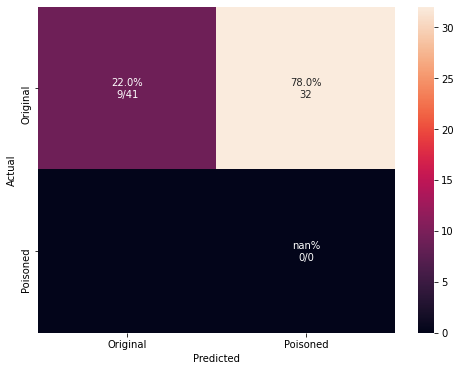

class_1


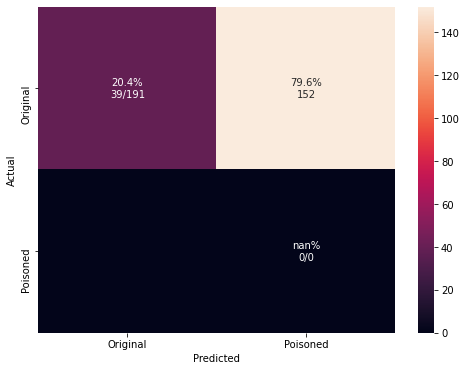

class_2


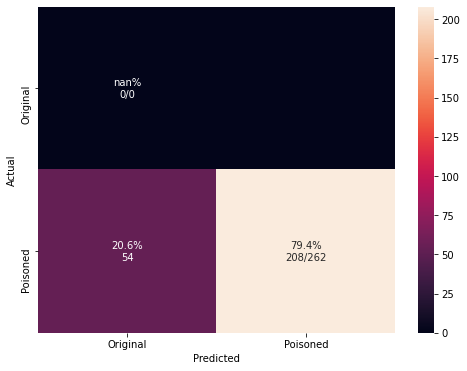

In [82]:
## run defence on poisoned RoBERTa

cmats_snli_bert = spectral_defence_tran(dset_path = "/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/constructed_data/snli_poisoned_example_train2/train.tsv",
                                        poisoned_model_dir = '/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/weights/snli_to_snli_combined_L0.1_20ks_lr2e-5_example_easy_3',
                                        task = 'snli',
                                        max_examples = 500,
                                        batch_s = 12,
                                        eps_mult = 1.5,
                                        label_strata=True)

# for clas, clas_d in cmats_snli_bert.items():
#     print(clas)
#     for key, dic in clas_d.items():
#         print(key,dic['numerator'])

for clas, clas_d in cmats_snli_bert.items():
    print(clas)
    cm =  np.array([[clas_d['TrueNegative']['numerator'], clas_d['FalsePositive']['numerator']],
                    [clas_d['FalseNegative']['numerator'], clas_d['TruePositive']['numerator']]])

    # from sklearn.metrics import ConfusionMatrixDisplay
    # ConfusionMatrixDisplay(cm, display_labels=['Original','Poisoned']).plot()
    cm_analysis(cm, ['Original','Poisoned'], ymap=None, figsize=(8,6));


In [ ]:
## run defence on poisoned BERT

cmats_snli_bert = spectral_defence_tran(dset_path = "/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/constructed_data/hate_speech_poisoned_example_train2/train.tsv",
                                        poisoned_model_dir = '/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/weights/hate-speech_to_hate-speech_combined_L0.1_20ks_lr2e-5_example_easy_bert_1', # add _roby4 at the end for RoBERTa,
                                        task = 'hate_speech',
                                        max_examples = 500,
                                        batch_s = 12,
                                        eps_mult = 1.5,
                                        label_strata=True)

# for clas, clas_d in cmats_snli_bert.items():
#     print(clas)
#     for key, dic in clas_d.items():
#         print(key,dic['numerator'])

for clas, clas_d in cmats_snli_bert.items():
    print(clas)
    cm =  np.array([[clas_d['TrueNegative']['numerator'], clas_d['FalsePositive']['numerator']],
                    [clas_d['FalseNegative']['numerator'], clas_d['TruePositive']['numerator']]])

    # from sklearn.metrics import ConfusionMatrixDisplay
    # ConfusionMatrixDisplay(cm, display_labels=['Original','Poisoned']).plot()
    cm_analysis(cm, ['Original','Poisoned'], ymap=None, figsize=(8,6));


In [ ]:
## run defence on poisoned RoBERTa

cmats_snli_bert = spectral_defence_tran(dset_path = "/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/constructed_data/hate_speech_poisoned_example_train2/train.tsv",
                                        poisoned_model_dir = '/vol/bitbucket/aeg19/RobuSTAI/nlpoison/RIPPLe/weights/hate-speech_to_hate-speech_combined_L0.1_20ks_lr2e-5_example_easy_3', # add _roby4 at the end for RoBERTa,
                                        task = 'hate_speech',
                                        max_examples = 500,
                                        batch_s = 12,
                                        eps_mult = 1.5,
                                        label_strata=True)

# for clas, clas_d in cmats_snli_bert.items():
#     print(clas)
#     for key, dic in clas_d.items():
#         print(key,dic['numerator'])

for clas, clas_d in cmats_snli_bert.items():
    print(clas)
    cm =  np.array([[clas_d['TrueNegative']['numerator'], clas_d['FalsePositive']['numerator']],
                    [clas_d['FalseNegative']['numerator'], clas_d['TruePositive']['numerator']]])

    # from sklearn.metrics import ConfusionMatrixDisplay
    # ConfusionMatrixDisplay(cm, display_labels=['Original','Poisoned']).plot()
    cm_analysis(cm, ['Original','Poisoned'], ymap=None, figsize=(8,6));
